<a href="https://colab.research.google.com/github/Saharsh2k5/ML_ASSIGNMENT_1/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2.Use Sklearn Library to train Decision Tress.

1) Train a decision tree model using the raw accelerometer data. Report the accuracy, precision, recall and confusion matrix of the model.

In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
activity_dirs = {
    'LAYING': "/content/drive/MyDrive/ML Assignment1/Combined/Train/LAYING",
    'SITTING': "/content/drive/MyDrive/ML Assignment1/Combined/Train/SITTING",
    'STANDING': "/content/drive/MyDrive/ML Assignment1/Combined/Train/STANDING",
    'WALKING': "/content/drive/MyDrive/ML Assignment1/Combined/Train/WALKING",
    'WALKING_DOWNSTAIRS': "/content/drive/MyDrive/ML Assignment1/Combined/Train/WALKING_DOWNSTAIRS",
    'WALKING_UPSTAIRS': "/content/drive/MyDrive/ML Assignment1/Combined/Train/WALKING_UPSTAIRS"
}
samples = []
labels = []


for activity, activity_dir in activity_dirs.items():
    file_names = os.listdir(activity_dir)
    for file_name in file_names:
        file_path = os.path.join(activity_dir, file_name)
        data = pd.read_csv(file_path)
        acc_x = data['accx'].values[:500]
        acc_y = data['accy'].values[:500]
        acc_z = data['accz'].values[:500]
        total_acceleration = np.concatenate((acc_x, acc_y, acc_z))
        samples.append(total_acceleration)
        labels.append(activity)

samples = np.array(samples)
labels = np.array(labels)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
encoded_labels = le.fit_transform(labels)


X_train, X_test, y_train, y_test = train_test_split(samples, encoded_labels, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision, recall, _, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7105
Precision: 0.6968
Recall: 0.7105
Confusion Matrix:
[[8 0 0 0 0 0]
 [0 7 0 0 0 0]
 [0 0 3 0 0 3]
 [0 0 1 3 1 1]
 [0 2 0 2 1 0]
 [0 0 1 0 0 5]]


2)
Train a decision tree model using the features obtained by TSFEL. Report the accuracy, precision, recall and confusion matrix of the model.

In [ ]:
pip install tsfel

In [ ]:
import pandas as pd
import numpy as np
import tsfel
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

activity_dirs = {
    'LAYING': "/content/drive/MyDrive/ML Assignment1/Combined/Train/LAYING",
    'SITTING': "/content/drive/MyDrive/ML Assignment1/Combined/Train/SITTING",
    'STANDING': "/content/drive/MyDrive/ML Assignment1/Combined/Train/STANDING",
    'WALKING': "/content/drive/MyDrive/ML Assignment1/Combined/Train/WALKING",
    'WALKING_DOWNSTAIRS': "/content/drive/MyDrive/ML Assignment1/Combined/Train/WALKING_DOWNSTAIRS",
    'WALKING_UPSTAIRS': "/content/drive/MyDrive/ML Assignment1/Combined/Train/WALKING_UPSTAIRS"
}

features_list = []
labels = []

for activity, activity_dir in activity_dirs.items():
    file_names = os.listdir(activity_dir)
    for file_name in file_names:
        file_path = os.path.join(activity_dir, file_name)
        data = pd.read_csv(file_path)

        cfg = tsfel.get_features_by_domain()
        features = tsfel.time_series_features_extractor(cfg, data, verbose=0)

        features_list.append(features.values.flatten())
        labels.append(activity)

features_array = np.array(features_list)
labels = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(features_array, labels, test_size=0.2, random_state=42)


clf = DecisionTreeClassifier(random_state=0)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy2 = accuracy_score(y_test, y_pred)
precision2 = precision_score(y_test, y_pred, average='weighted')
recall2 = recall_score(y_test, y_pred, average='weighted')
conf_matrix2 = confusion_matrix(y_test, y_pred)

print("accuracy=",accuracy2)
print("precision=",precision2)
print("recall=",recall2)
print("Confusion Matrix:")
print(conf_matrix2)


<ipython-input-32-98cb89962485>:28: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data, verbose=0)
<ipython-input-32-98cb89962485>:28: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data, verbose=0)
<ipython-input-32-98cb89962485>:28: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data, verbose=0)
<ipython-input-32-98cb89962485>:28: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data, verbose=0)
<ipython-input-32-98cb89962485>:28: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data, verbose=0)
<ipython-input-32-98cb89962485>:28: UserWarning: Using default sampling frequency set in config

accuracy= 0.7307692307692307
precision= 0.7987179487179487
recall= 0.7307692307692307
Confusion Matrix:
[[6 0 0 0 0 0]
 [1 3 0 0 0 0]
 [0 2 3 0 0 0]
 [0 0 0 2 1 2]
 [0 0 0 0 4 0]
 [1 0 0 0 0 1]]


3)
Train a decision tree model using the features provided in the dataset. Report the accuracy, precision, recall and confusion matrix of the model.

In [ ]:
import pandas as pd
from collections import defaultdict
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report


features_path = "/content/drive/MyDrive/ML Assignment1/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt"
labels_path = "/content/drive/MyDrive/ML Assignment1/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt"
features_names_path = "/content/drive/MyDrive/ML Assignment1/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/features.txt"

feature_names = pd.read_csv(features_names_path, delim_whitespace=True, header=None)[1].tolist()

def make_unique(names):
    counts = defaultdict(int)
    unique_names = []
    for name in names:
        if counts[name] > 0:
            new_name = f"{name}_{counts[name]}"
            unique_names.append(new_name)
        else:
            unique_names.append(name)
        counts[name] += 1
    return unique_names

feature_names = make_unique(feature_names)

X = pd.read_csv(features_path, delim_whitespace=True, header=None, names=feature_names)
y = pd.read_csv(labels_path, delim_whitespace=True, header=None, names=['Activity'])

print("Features shape:", X.shape)
print("Labels shape:", y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=0)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy3 = accuracy_score(y_test, y_pred)
precision3 = precision_score(y_test, y_pred, average='weighted')
recall3 = recall_score(y_test, y_pred, average='weighted')
conf_matrix3 = confusion_matrix(y_test, y_pred)

print("accuracy=",accuracy3)
print("precision=",precision3)
print("recall=",recall3)
print("Confusion Matrix:")
print(conf_matrix3)

Features shape: (7352, 561)
Labels shape: (7352, 1)
accuracy= 0.9401767505098573
precision= 0.9409522853475589
recall= 0.9401767505098573
Confusion Matrix:
[[236   9   2   0   0   0]
 [ 11 186   3   0   0   0]
 [ 10  12 184   0   0   0]
 [  0   0   0 242  20   0]
 [  0   1   0  20 255   0]
 [  0   0   0   0   0 280]]


Compare the results of the three models. Which model do you think is better?

According to the results we obtained the better model is decision tree model using the features provided in the dataset as the precision, accuracy and the recall are higher for this model. This model likely benefits from well-engineered features that capture the nuances of the data effectively.

In [ ]:
accuracy=[accuracy1,accuracy2,accuracy3]
precision=[precision1,precision2,precision3]
recall=[recall1,recall2,recall3]
Confusion_matrix=[conf_matrix1,conf_matrix2,conf_matrix3]

2.
Train Decision Tree with varying depths (2-8) using all above 3 methods. Plot the accuracy of the model on test data vs the depth of the tree

Depth: 2, Accuracy: 0.5526
Depth: 3, Accuracy: 0.6053
Depth: 4, Accuracy: 0.6842
Depth: 5, Accuracy: 0.7895
Depth: 6, Accuracy: 0.7632
Depth: 7, Accuracy: 0.7105
Depth: 8, Accuracy: 0.7105


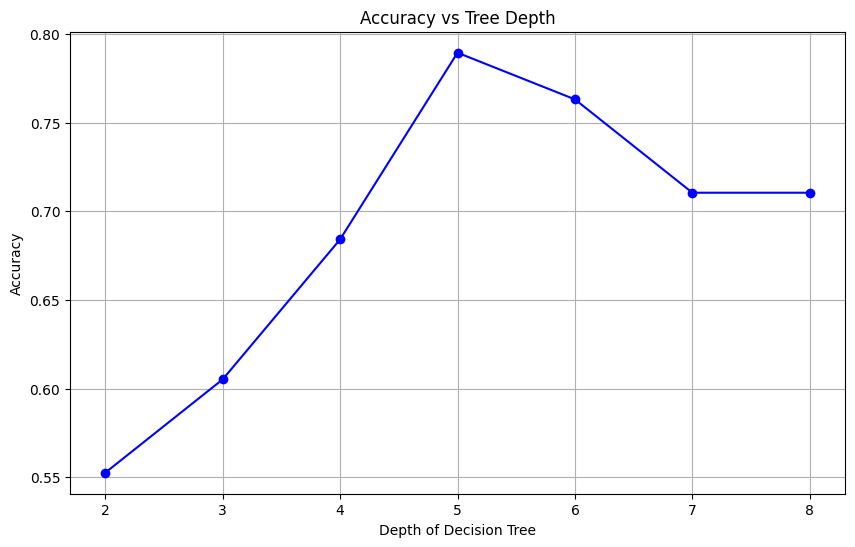

<ipython-input-43-cc9253367ac5>:97: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data, verbose=0)
<ipython-input-43-cc9253367ac5>:97: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data, verbose=0)
<ipython-input-43-cc9253367ac5>:97: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data, verbose=0)
<ipython-input-43-cc9253367ac5>:97: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data, verbose=0)
<ipython-input-43-cc9253367ac5>:97: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data, verbose=0)
<ipython-input-43-cc9253367ac5>:97: UserWarning: Using default sampling frequency set in config


Depth: 2
Accuracy: 0.62

Depth: 3
Accuracy: 0.81

Depth: 4
Accuracy: 0.77

Depth: 5
Accuracy: 0.77

Depth: 6
Accuracy: 0.77

Depth: 7
Accuracy: 0.77

Depth: 8
Accuracy: 0.77


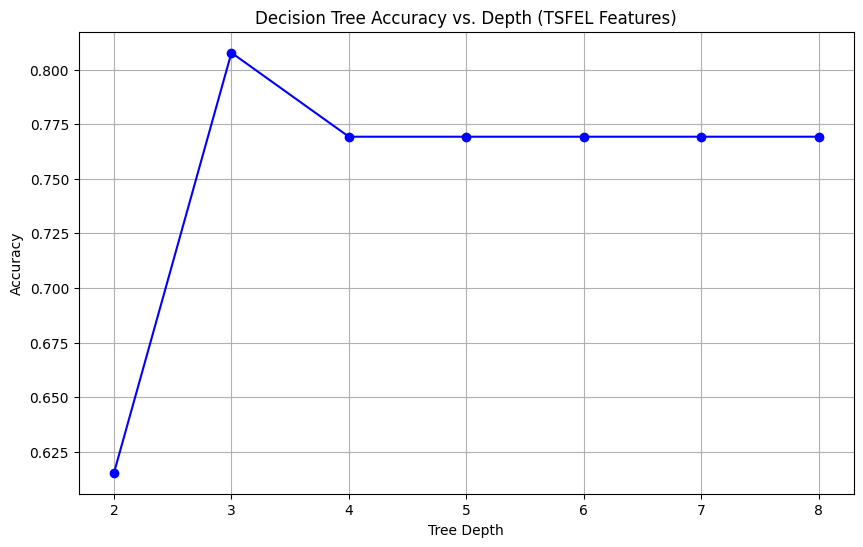

Depth: 2, Accuracy: 0.55
Depth: 3, Accuracy: 0.79
Depth: 4, Accuracy: 0.88
Depth: 5, Accuracy: 0.89
Depth: 6, Accuracy: 0.92
Depth: 7, Accuracy: 0.93
Depth: 8, Accuracy: 0.94


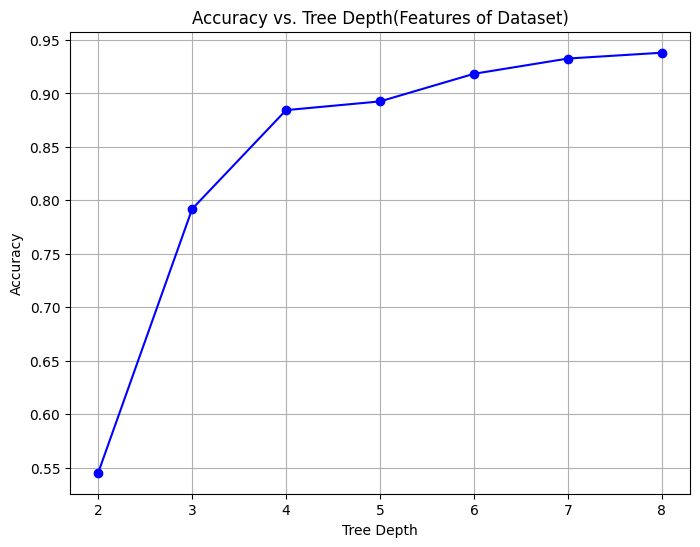

In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


activity_dirs = {
    'LAYING': "/content/drive/MyDrive/ML Assignment1/Combined/Train/LAYING",
    'SITTING': "/content/drive/MyDrive/ML Assignment1/Combined/Train/SITTING",
    'STANDING': "/content/drive/MyDrive/ML Assignment1/Combined/Train/STANDING",
    'WALKING': "/content/drive/MyDrive/ML Assignment1/Combined/Train/WALKING",
    'WALKING_DOWNSTAIRS': "/content/drive/MyDrive/ML Assignment1/Combined/Train/WALKING_DOWNSTAIRS",
    'WALKING_UPSTAIRS': "/content/drive/MyDrive/ML Assignment1/Combined/Train/WALKING_UPSTAIRS"
}


samples = []
labels = []


for activity, activity_dir in activity_dirs.items():
    file_names = os.listdir(activity_dir)
    for file_name in file_names:
        file_path = os.path.join(activity_dir, file_name)
        data = pd.read_csv(file_path)
        acc_x = data['accx'].values[:500]
        acc_y = data['accy'].values[:500]
        acc_z = data['accz'].values[:500]
        total_acceleration = np.concatenate((acc_x, acc_y, acc_z))
        samples.append(total_acceleration)
        labels.append(activity)

samples = np.array(samples)
labels = np.array(labels)
le = LabelEncoder()
encoded_labels = le.fit_transform(labels)

X_train, X_test, y_train, y_test = train_test_split(samples, encoded_labels, test_size=0.3, random_state=42)


depths = range(2, 9)
accuracies = []

for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy1 = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy1)
    print(f"Depth: {depth}, Accuracy: {accuracy1:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(depths, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('Depth of Decision Tree')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Tree Depth')
plt.xticks(depths)
plt.grid(True)
plt.show()


import pandas as pd
import numpy as np
import tsfel
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


features_list = []
labels = []

for activity, activity_dir in activity_dirs.items():
    file_names = os.listdir(activity_dir)
    for file_name in file_names:
        file_path = os.path.join(activity_dir, file_name)
        data = pd.read_csv(file_path)


        cfg = tsfel.get_features_by_domain()
        features = tsfel.time_series_features_extractor(cfg, data, verbose=0)

        features_list.append(features.values.flatten())
        labels.append(activity)

features_array = np.array(features_list)
labels = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(features_array, labels, test_size=0.2, random_state=42)


depths = range(2, 9)
accuracies = []

for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accuracy2 = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy2)

    print(f"\nDepth: {depth}")
    print(f"Accuracy: {accuracy2:.2f}")

plt.figure(figsize=(10, 6))
plt.plot(depths, accuracies, marker='o', linestyle='-', color='b')
plt.title('Decision Tree Accuracy vs. Depth (TSFEL Features)')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.xticks(depths)
plt.grid(True)
plt.show()


import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from collections import defaultdict

features_path = "/content/drive/MyDrive/ML Assignment1/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt"
labels_path = "/content/drive/MyDrive/ML Assignment1/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt"
features_names_path = "/content/drive/MyDrive/ML Assignment1/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/features.txt"

feature_names = pd.read_csv(features_names_path, delim_whitespace=True, header=None)[1].tolist()

def make_unique(names):
    counts = defaultdict(int)
    unique_names = []
    for name in names:
        if counts[name] > 0:
            new_name = f"{name}_{counts[name]}"
            unique_names.append(new_name)
        else:
            unique_names.append(name)
        counts[name] += 1
    return unique_names

feature_names = make_unique(feature_names)

X = pd.read_csv(features_path, delim_whitespace=True, header=None, names=feature_names)
y = pd.read_csv(labels_path, delim_whitespace=True, header=None, names=['Activity'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


accuracies = []


for depth in range(2, 9):

    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)

    clf.fit(X_train, y_train)


    y_pred = clf.predict(X_test)


    accuracy3 = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy3)

    print(f"Depth: {depth}, Accuracy: {accuracy3:.2f}")


plt.figure(figsize=(8, 6))
plt.plot(range(2, 9), accuracies, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs. Tree Depth(Features of Dataset)')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(range(2, 9))
plt.show()


Are there any participants/ activitivies where the Model performace is bad? If Yes, Why? [0.5 mark]


Raw Accelerometer Data:

Activity Misclassification: The model struggles to differentiate between some activities, leading to errors. For example, it might confuse sitting with standing because their acceleration patterns can be similar.

Why? Raw data might be noisy and not as clear for the model to learn distinct differences.

TSFEL Features:

Few Misclassifications: Some activities still get mixed up occasionally, but overall, the model performs well. For example, walking_upstairs and walking_downstairs might be confused with walking or standing.

Why? While TSFEL features are good, they might not capture every subtle detail for every activity.

Provided Features:

Small Errors: Even with provided features, there are minor mistakes, but they are quite rare. Walking_upstairs and walking_downstairs might sometimes be confused with each other or with walking.

Why? The features are well-designed, but some activities are inherently harder to distinguish.


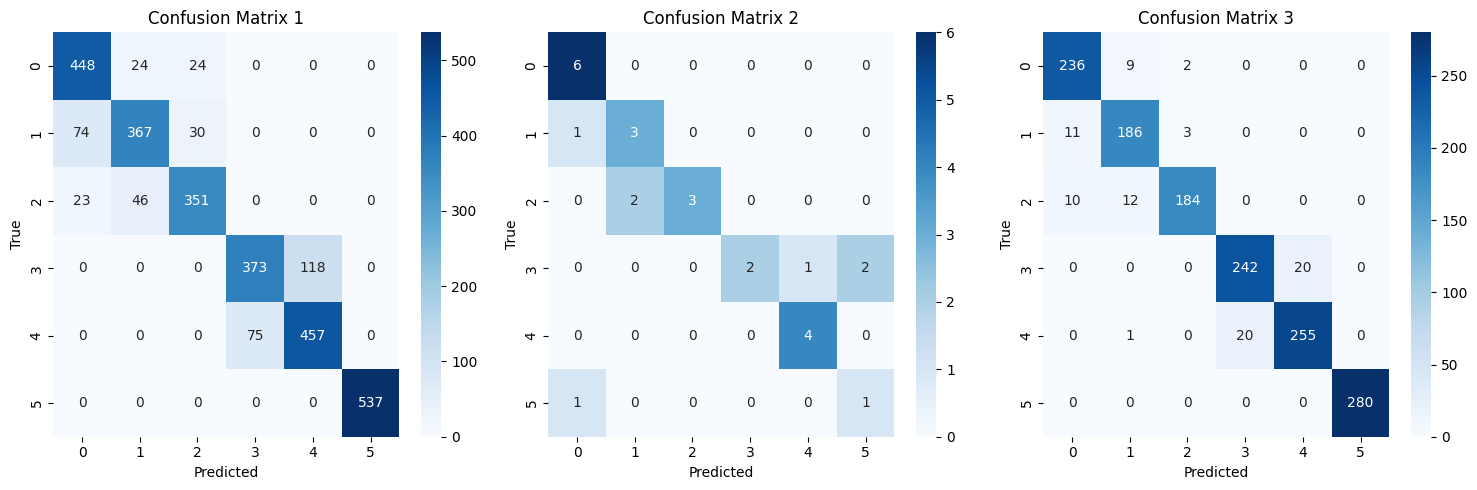

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


conf_matrices = [conf_matrix1, conf_matrix2, conf_matrix3]

accuracy=[accuracy1,accuracy2,accuracy3]
precision=[precision1,precision2,precision3]
recall=[recall1,recall2,recall3]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, (cm, ax) in enumerate(zip(conf_matrices, axes)):
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='Blues')
    ax.set_title(f'Confusion Matrix {i+1}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

plt.tight_layout()
plt.show()
